In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Implementing Feedforward neural networks with Keras and TensorFlow
# a. Import the necessary packages
# b. Load the training and testing data (MNIST/CIFAR10)
# c. Define the network architecture using Keras
# d. Train the model using SGD
# e. Evaluate the network
# f. Plot the training loss and accuracy

In [3]:
# a. import 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# b. load data

train_data_path = 'C:/Users/Acer/Downloads/dataset/mnist-jpg/train'
test_data_path = 'C:/Users/Acer/Downloads/dataset/mnist-jpg/test'

In [29]:
print(train_data_path)

C:/Users/Acer/Downloads/dataset/mnist-jpg/train


In [68]:
# Image data generator for training data
load = ImageDataGenerator( rescale=1.0/255 )

# Create data generators
train_generator = load.flow_from_directory(
    train_data_path,
    target_size=(28, 28),
    batch_size= 10000,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True,
)

test_generator = load.flow_from_directory(
    test_data_path,
    target_size = (28,28),
    class_mode='categorical',
    batch_size= 2000,
    color_mode = 'grayscale',
    shuffle=True
)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [69]:
x_train, y_train = train_generator[0]
x_test, y_test = test_generator[0]

In [70]:
# plt.imshow(x_train[10])
# plt.imshow(x_test[10])

In [71]:
# c. Define the network architecture using Keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary(

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
# d. Train the model using SGD
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))

Epoch 1/8
313/313 [==============================] - 2s 4ms/step - loss: 1.3948 - accuracy: 0.6632 - val_loss: 0.8377 - val_accuracy: 0.8360
Epoch 2/8
313/313 [==============================] - 1s 3ms/step - loss: 0.6828 - accuracy: 0.8486 - val_loss: 0.5661 - val_accuracy: 0.8795
Epoch 3/8
313/313 [==============================] - 1s 3ms/step - loss: 0.5165 - accuracy: 0.8719 - val_loss: 0.4670 - val_accuracy: 0.8915
Epoch 4/8
313/313 [==============================] - 1s 3ms/step - loss: 0.4423 - accuracy: 0.8851 - val_loss: 0.4185 - val_accuracy: 0.8995
Epoch 5/8
313/313 [==============================] - 1s 3ms/step - loss: 0.3984 - accuracy: 0.8934 - val_loss: 0.3881 - val_accuracy: 0.9025
Epoch 6/8
313/313 [==============================] - 1s 3ms/step - loss: 0.3679 - accuracy: 0.9017 - val_loss: 0.3642 - val_accuracy: 0.9115
Epoch 7/8
313/313 [==============================] - 1s 3ms/step - loss: 0.3456 - accuracy: 0.9059 - val_loss: 0.3496 - val_accuracy: 0.9105
Epoch 8/8
313

In [73]:
# e. Evaluate the network
loss,accuracy = model.evaluate(x_test,y_test)
print(loss)
print(accuracy)


63/63 [==============================] - 0s 2ms/step - loss: 0.3359 - accuracy: 0.9180
0.3358609080314636
0.9179999828338623


63/63 [==============================] - 0s 2ms/step
Actual Number:  0
Predicted Number:  0


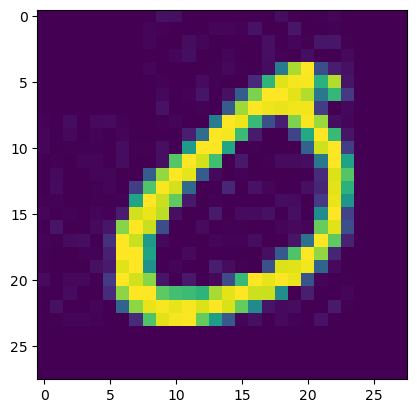

In [74]:
n = 20 
plt.imshow(x_test[n])
predicted_value = model.predict(x_test)
print("Actual Number: ",np.argmax(y_test[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))

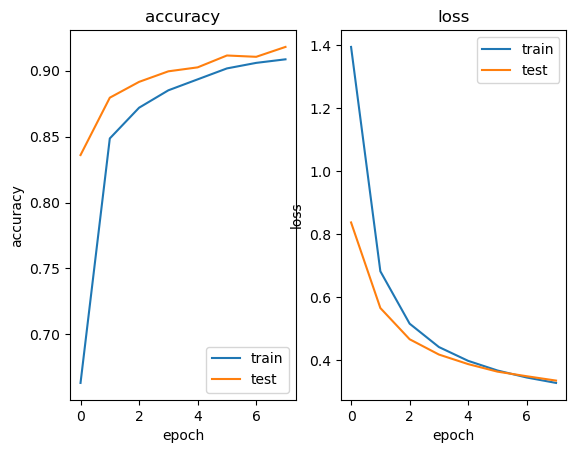

In [75]:
# f. Plot the training loss and accuracy

plt.figure()

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])